# Project Modeling

In [43]:
#import packages
import pandas as pd
import numpy as np
import json
import seaborn as sns
from itertools import product
import matplotlib.pyplot as plt
%matplotlib inline

#model imports
from sklearn.model_selection import cross_val_score, KFold,train_test_split
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report, precision_score, recall_score, f1_score, matthews_corrcoef, ConfusionMatrixDisplay

#Knn import
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler 

#logistic import
import statsmodels.api as sm

#decision tree import
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#random forest import
from sklearn.ensemble import RandomForestClassifier

#cross validaiton import
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

import xgboost as xgb
from xgboost import XGBClassifier

In [2]:
#set seaborn pallete
sns.set_palette("Spectral")

# Data Dictionary

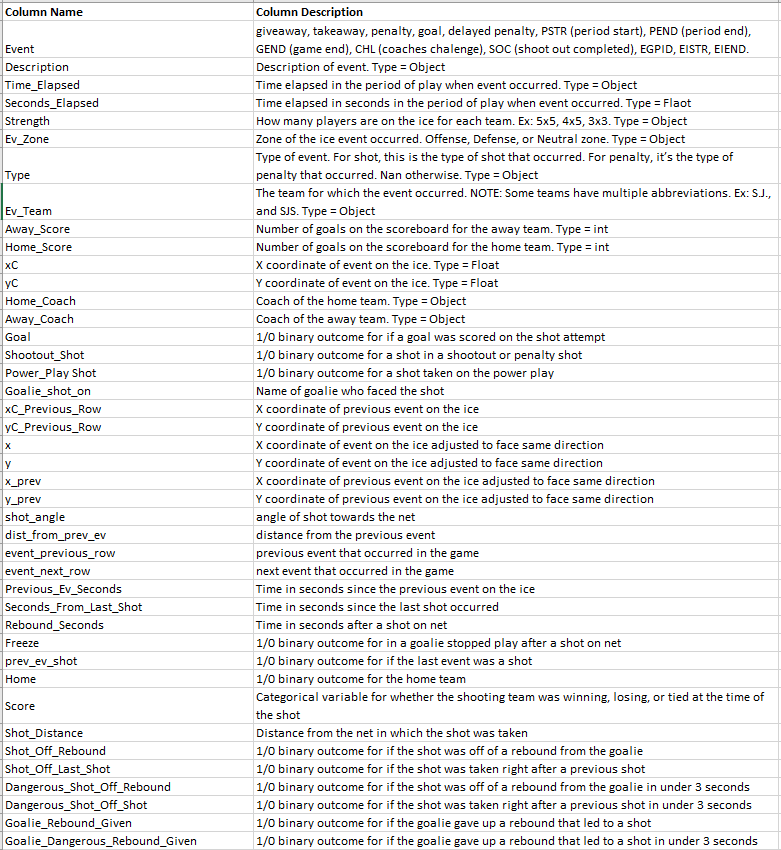


In [3]:
#read in data
df = pd.read_excel('cleaned_NHL_fenwick_even_strength_2021.xlsx')
df.head()

,Unnamed: 0,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,...,prev_ev_shot,Home,Score,Shot_Distance,Shot_Off_Rebound,Shot_Off_Last_Shot,Dangerous_Shot_Off_Rebound,Dangerous_Shot_Off_Shot,Goalie_rebound_given,Goalie__dangerous_rebound_given
0,2,20001,2021-01-13,1,SHOT,"PHI ONGOAL - #11 KONECNY, Wrist, Off. Zone, 32...",0:16,16,5x5,Off,...,0,1,Tied,32,0,0,0,0,0.0,0.0
1,5,20001,2021-01-13,1,SHOT,"PIT ONGOAL - #9 RODRIGUES, Wrist, Off. Zone, 4...",0:34,34,5x5,Off,...,1,0,Tied,47,0,0,0,0,0.0,0.0
2,8,20001,2021-01-13,1,SHOT,"PHI ONGOAL - #86 FARABEE, Backhand, Off. Zone,...",1:05,65,5x5,Off,...,0,1,Tied,48,0,0,0,0,0.0,0.0
3,20,20001,2021-01-13,1,SHOT,"PIT ONGOAL - #9 RODRIGUES, Snap, Off. Zone, 60...",2:51,171,5x5,Off,...,0,0,Tied,60,0,0,0,0,0.0,0.0
4,23,20001,2021-01-13,1,MISS,"PHI #5 MYERS, Slap, Wide of Net, Off. Zone, 54...",3:29,209,5x5,Off,...,0,1,Tied,54,0,0,0,0,0.0,0.0


In [4]:
df.shape

(59264, 61)

In [5]:
df.columns

Index(['Unnamed: 0', 'Game_Id', 'Date', 'Period', 'Event', 'Description',
       'Time_Elapsed', 'Seconds_Elapsed', 'Strength', 'Ev_Zone', 'Type',
       'Ev_Team', 'Home_Zone', 'Away_Team', 'Home_Team', 'p1_name', 'p1_ID',
       'p2_name', 'p2_ID', 'p3_name', 'p3_ID', 'Away_Score', 'Home_Score',
       'Away_Goalie', 'Away_Goalie_Id', 'Home_Goalie', 'Home_Goalie_Id', 'xC',
       'yC', 'Goal', 'Shootout_shot', 'Power_play_shot', 'Goalie_shot_on',
       'xC_Previous_Row', 'yC_Previous_Row', 'x', 'y', 'x_prev', 'y_prev',
       'x_dist', 'x_dist_prev', 'shot_angle', 'dist_from_prev_ev',
       'Ev_Team_Previous_Row', 'Game_Id_Previous_Row', 'Event_Previous_Row',
       'Event_Next_Row', 'Previous_Ev_Seconds', 'Seconds_From_Last_Shot',
       'Rebound_Seconds', 'Freeze', 'prev_ev_shot', 'Home', 'Score',
       'Shot_Distance', 'Shot_Off_Rebound', 'Shot_Off_Last_Shot',
       'Dangerous_Shot_Off_Rebound', 'Dangerous_Shot_Off_Shot',
       'Goalie_rebound_given', 'Goalie__dangerous_rebou

In [6]:
df.isnull().sum()[df.isnull().sum() != 0]

Type                                   5
p1_name                               35
p1_ID                                 78
p2_name                            55650
p2_ID                              55657
p3_name                            56435
p3_ID                              56435
Away_Goalie                          804
Away_Goalie_Id                       804
Home_Goalie                          803
Home_Goalie_Id                       803
xC                                   146
yC                                   146
Goalie_shot_on                       242
xC_Previous_Row                      624
yC_Previous_Row                      624
x                                    146
y                                    146
x_prev                               624
y_prev                               624
x_dist                               146
x_dist_prev                          624
shot_angle                           146
dist_from_prev_ev                    728
Ev_Team_Previous

In [7]:
df2 = df[['Unnamed: 0', 'Game_Id', 'Date', 'Period', 'Event',
       'Seconds_Elapsed', 'Strength', 'Ev_Zone', 'Type',
       'Ev_Team',
       'Goal', 'Shootout_shot', 'Power_play_shot', 'Goalie_shot_on',
       'Home', 'x', 'y',  'x_dist', 'shot_angle',
        'Event_Previous_Row', 'x_prev', 'y_prev', 'prev_ev_shot',
        'x_dist_prev', 'Score',
       'dist_from_prev_ev', 'Previous_Ev_Seconds', 'Seconds_From_Last_Shot',
       'Rebound_Seconds', 'Freeze', 'Shot_Distance', 'Shot_Off_Rebound',
       'Shot_Off_Last_Shot', 'Dangerous_Shot_Off_Rebound',
       'Dangerous_Shot_Off_Shot', 'Goalie_rebound_given',
       'Goalie__dangerous_rebound_given']]

In [8]:
df2.dtypes

Unnamed: 0                           int64
Game_Id                              int64
Date                                object
Period                               int64
Event                               object
Seconds_Elapsed                      int64
Strength                            object
Ev_Zone                             object
Type                                object
Ev_Team                             object
Goal                                 int64
Shootout_shot                        int64
Power_play_shot                      int64
Goalie_shot_on                      object
Home                                 int64
x                                  float64
y                                  float64
x_dist                             float64
shot_angle                         float64
Event_Previous_Row                  object
x_prev                             float64
y_prev                             float64
prev_ev_shot                         int64
x_dist_prev

In [9]:
#get dummies for Type
dum1 = pd.get_dummies(df2['Type'], prefix='Type', drop_first=True)
dum2 = pd.get_dummies(df2['Score'], prefix='Score', drop_first=True)
df2 = pd.concat([df2, dum1, dum2], axis=1)

In [10]:
df2.columns

Index(['Unnamed: 0', 'Game_Id', 'Date', 'Period', 'Event', 'Seconds_Elapsed',
       'Strength', 'Ev_Zone', 'Type', 'Ev_Team', 'Goal', 'Shootout_shot',
       'Power_play_shot', 'Goalie_shot_on', 'Home', 'x', 'y', 'x_dist',
       'shot_angle', 'Event_Previous_Row', 'x_prev', 'y_prev', 'prev_ev_shot',
       'x_dist_prev', 'Score', 'dist_from_prev_ev', 'Previous_Ev_Seconds',
       'Seconds_From_Last_Shot', 'Rebound_Seconds', 'Freeze', 'Shot_Distance',
       'Shot_Off_Rebound', 'Shot_Off_Last_Shot', 'Dangerous_Shot_Off_Rebound',
       'Dangerous_Shot_Off_Shot', 'Goalie_rebound_given',
       'Goalie__dangerous_rebound_given', 'Type_DEFLECTED', 'Type_SLAP SHOT',
       'Type_SNAP SHOT', 'Type_TIP-IN', 'Type_WRAP-AROUND', 'Type_WRIST SHOT',
       'Score_Home Team Winning', 'Score_Tied'],
      dtype='object')

In [11]:
#xheck for missing values
# Spot check your work
df2.isnull().sum()[df2.isnull().sum() != 0]

Type                                 5
Goalie_shot_on                     242
x                                  146
y                                  146
x_dist                             146
shot_angle                         146
x_prev                             624
y_prev                             624
x_dist_prev                        624
dist_from_prev_ev                  728
Goalie_rebound_given                 1
Goalie__dangerous_rebound_given      1
dtype: int64

In [12]:
#fill in NAN for dist_from_prev_ev, x_dist_prev.
df2.loc[df['dist_from_prev_ev'].isnull(), 'dist_from_prev_ev'] = 0
df2.loc[df['x_dist_prev'].isnull(), 'x_dist_prev'] = 0
#df2['dist_from_prev_ev'].fillna(0)
#df2['x_dist_prev'].fillna(0)

In [13]:
#df_check = df2[(df2['x'].isnull())]
df2.isnull().sum()[df2.isnull().sum() != 0]
#df_check.head()             

Type                                 5
Goalie_shot_on                     242
x                                  146
y                                  146
x_dist                             146
shot_angle                         146
x_prev                             624
y_prev                             624
Goalie_rebound_given                 1
Goalie__dangerous_rebound_given      1
dtype: int64

In [14]:
#drop NaN rows
df2 = df2.dropna()

In [15]:
#check NaN again
df2.isnull().sum()[df2.isnull().sum() != 0]

Series([], dtype: int64)

In [16]:
df2.shape

(58298, 45)

In [17]:
#check out target feature
df2.Goal.value_counts()

0    54627
1     3671
Name: Goal, dtype: int64

In [18]:
df2.Goal.value_counts(normalize=True)

0    0.93703
1    0.06297
Name: Goal, dtype: float64

<AxesSubplot:xlabel='Goal', ylabel='Count'>

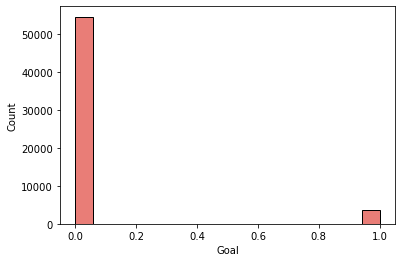

In [19]:
#p = sns.catplot(x='Goal', y='label', kind='bar', data = df2,
#                 height = 8, estimator=len)
#p.set_xticklabels(rotation=45, horizontalalignment='right');

sns.histplot(data=df2, x="Goal")

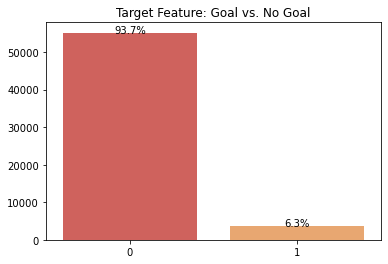

In [20]:
x = ['0','1']
y = [55150, 3724]
percentage = [93.67, 6.33]
ax = sns.barplot(x=x, y=y)#, palette='PuBuGn_r')
patches = ax.patches
for i in range(len(patches)):
    x = patches[i].get_x() + patches[i].get_width()/2
    y = patches[i].get_height()+1.25
    ax.annotate('{:.1f}%'.format(percentage[i]), (x, y), ha='center')
    
ax.set_title("Target Feature: Goal vs. No Goal")
plt.show()

Target feature is very imbalanced, as expected.

In [21]:
#split up data into features and target
X= df2[['Home',
        'x', 'y',
        'dist_from_prev_ev',
        'x_prev', 'y_prev',
        'Previous_Ev_Seconds', 
        'Seconds_From_Last_Shot', 
        'Rebound_Seconds',
        'shot_angle',
        'Shot_Distance', 
        'Shot_Off_Rebound', 
        'Shot_Off_Last_Shot',
        'Dangerous_Shot_Off_Rebound', 
        'Dangerous_Shot_Off_Shot', 
        'Score_Tied', 'Score_Home Team Winning',
        'prev_ev_shot',
        'Type_DEFLECTED', 'Type_SLAP SHOT',
        'Type_SNAP SHOT', 'Type_TIP-IN', 'Type_WRAP-AROUND', 'Type_WRIST SHOT'
        ]]
y= df2['Goal']

In [22]:
#train test split at 25%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25)
X_train.columns

Index(['Home', 'x', 'y', 'dist_from_prev_ev', 'x_prev', 'y_prev',
       'Previous_Ev_Seconds', 'Seconds_From_Last_Shot', 'Rebound_Seconds',
       'shot_angle', 'Shot_Distance', 'Shot_Off_Rebound', 'Shot_Off_Last_Shot',
       'Dangerous_Shot_Off_Rebound', 'Dangerous_Shot_Off_Shot', 'Score_Tied',
       'Score_Home Team Winning', 'prev_ev_shot', 'Type_DEFLECTED',
       'Type_SLAP SHOT', 'Type_SNAP SHOT', 'Type_TIP-IN', 'Type_WRAP-AROUND',
       'Type_WRIST SHOT'],
      dtype='object')

In [23]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (43723, 24)
y_train shape: (43723,)
X_test shape: (14575, 24)
y_test shape: (14575,)


# Knn

In [24]:
# Scale your features
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [25]:
model = KNeighborsClassifier(n_neighbors=25)
model.fit(scaled_X_train, y_train) 

KNeighborsClassifier(n_neighbors=25)

In [26]:
# Metrics
y_pred = model.predict(scaled_X_test) #returns 0 or 1
pred_proba = model.predict_proba(scaled_X_test)[:,1] # returns predicted probabilites 
print("Accuracy", accuracy_score(y_test, y_pred).round(3))
print("AUC", roc_auc_score(y_test, pred_proba).round(3))
print(confusion_matrix(y_test, y_pred))

Accuracy 0.935
AUC 0.701
[[13631     0]
 [  943     1]]


# Logistic

In [27]:
#X_logit = X_train[['Shootout_shot', 'Power_play_shot','shot_angle',
       #'Shot_Distance', 'Shot_Off_Rebound', 'Shot_Off_Last_Shot',
       #'Dangerous_Shot_Off_Rebound', 'Dangerous_Shot_Off_Shot', 'Type_DEFLECTED',
       #'Type_SLAP SHOT', 'Type_TIP-IN', 'Type_WRAP-AROUND',
       #'Type_WRIST SHOT']]

#5x5 features
X_logit = X_train[['Home',
        'x', 'y',
        'x_prev', 'y_prev',
        'dist_from_prev_ev',
        'Previous_Ev_Seconds', 
        'Seconds_From_Last_Shot', 
        'Rebound_Seconds',
        'shot_angle',
        'Shot_Distance', 
        'Shot_Off_Rebound', 
        'Shot_Off_Last_Shot',
        'Dangerous_Shot_Off_Rebound', 
        'Dangerous_Shot_Off_Shot', 
        'Score_Tied', #'Score_Home Team Winning',
        'prev_ev_shot',
        'Type_DEFLECTED', 'Type_SLAP SHOT',
        'Type_SNAP SHOT', 'Type_TIP-IN', 'Type_WRAP-AROUND', 'Type_WRIST SHOT'
        ]]

In [28]:
lm = sm.Logit(y_train, sm.add_constant(X_logit))
model = lm.fit()
model.summary()

Optimization terminated successfully.
         Current function value: 0.212241
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                   Goal   No. Observations:                43723
Model:                          Logit   Df Residuals:                    43699
Method:                           MLE   Df Model:                           23
Date:                Thu, 20 Jan 2022   Pseudo R-squ.:                 0.09081
Time:                        15:16:58   Log-Likelihood:                -9279.8
converged:                       True   LL-Null:                       -10207.
Covariance Type:            nonrobust   LLR p-value:                     0.000
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                         -4.6339      0.561     -8.266      0.000      -5.733      -3.535
Home                           0.0606      0.041      1.489      0.136      -0.019       0.140
x                              0.0304      0.003     10.636      0.000       0.025       0.036
y                             -0.0018      0.001     -1.331      0.183      -0.005       0.001
x_prev                        -0.0020      0.001     -1.968      0.049      -0.004   -8.24e-06
y_prev                      5.097e-05      0.001      0.056      0.955      -0.002       0.002
dist_from_prev_ev             -0.0037      0.001     -2.750      0.006      -0.006      -0.001
Previous_Ev_Seconds           -0.0079      0.002     -4.517      0.000      -0.011      -0.004
Seconds_From_Last_Shot         0.0088      0.005      1.773      0.076      -0.001       0.019
Rebound_Seconds               -0.0004      0.007     -0.058      0.954      -0.013       0.013
shot_angle                    -0.0136      0.001    -16.459      0.000      -0.015      -0.012
Shot_Distance                 -0.0152      0.003     -5.834      0.000      -0.020      -0.010
Shot_Off_Rebound               0.0576      0.567      0.102      0.919      -1.054       1.169
Shot_Off_Last_Shot             1.4209      0.427      3.326      0.001       0.584       2.258
Dangerous_Shot_Off_Rebound    -0.3026      0.180     -1.678      0.093      -0.656       0.051
Dangerous_Shot_Off_Shot        0.7437      0.141      5.293      0.000       0.468       1.019
Score_Tied                    -0.0637      0.043     -1.493      0.135      -0.147       0.020
prev_ev_shot                  -0.4670      0.067     -7.010      0.000      -0.598      -0.336
Type_DEFLECTED                -0.1594      0.134     -1.193      0.233      -0.421       0.103
Type_SLAP SHOT                 0.5940      0.102      5.798      0.000       0.393       0.795
Type_SNAP SHOT                 0.5910      0.086      6.888      0.000       0.423       0.759
Type_TIP-IN                    0.1203      0.094      1.284      0.199      -0.063       0.304
Type_WRAP-AROUND              -0.8875      0.227     -3.915      0.000      -1.332      -0.443
Type_WRIST SHOT                0.2181      0.072      3.042      0.002       0.078       0.359
==============================================================================================
"""

It's interesting to interpret the p-values here to see which features are significant. I thought the rebound features would be very usefull, but the model disagrees. I think it's because they happen so infrequently in the data. The shot types also don't look to useful, but everything else is significant.

# Decision Tree

In [29]:
#fit tree model
model = DecisionTreeClassifier(max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [30]:
# Metrics
y_pred = model.predict(scaled_X_test) #returns 0 or 1
pred_proba = model.predict_proba(scaled_X_test)[:,1] # returns predicted probabilites 
print("Accuracy", accuracy_score(y_test, y_pred).round(3))
print("AUC", roc_auc_score(y_test, pred_proba).round(3))
print(confusion_matrix(y_test, y_pred))

Accuracy 0.935
AUC 0.5
[[13631     0]
 [  944     0]]


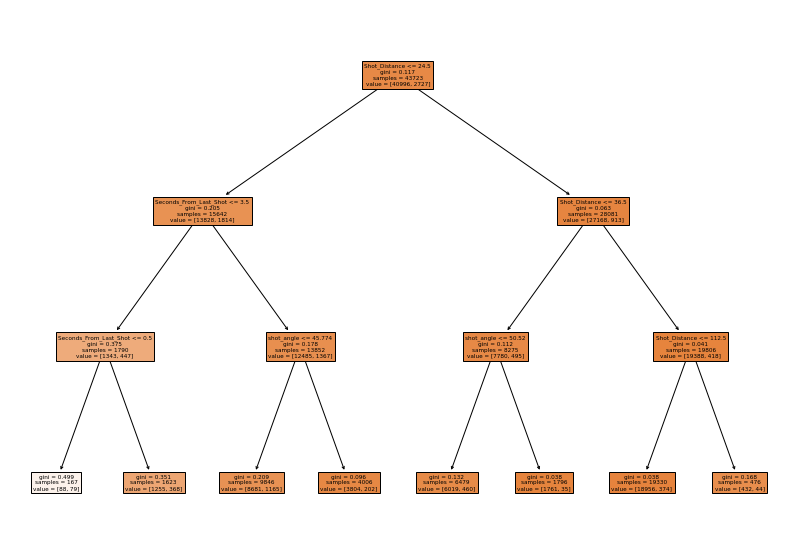

In [31]:
#plot tree
plt.figure(figsize=(14,10))
tree.plot_tree(model, feature_names= X.columns,  filled=True);

# Random Forest

In [32]:
#specify model
model = RandomForestClassifier(n_estimators=2000, max_depth=25, random_state=42)
#model = RandomForestClassifier()
#Fit your model on the features (X) and the target (y)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=25, n_estimators=2000, random_state=42)

In [33]:
# Metrics

y_pred = model.predict(X_test) #returns 0 or 1
pred_proba = model.predict_proba(X_test)[:,1] # returns predicted probabilites 
print("Accuracy", accuracy_score(y_test, y_pred).round(3))
print("AUC", roc_auc_score(y_test, pred_proba).round(3))
print(confusion_matrix(y_test, y_pred))

Accuracy 0.935
AUC 0.746
[[13611    20]
 [  925    19]]


This accuracy score is high because my target variable is unbalanced. However, I don't think it makes sense to resample with undersampling, oversampling, or SMOTE in this case because in Hockey goals are always going to be scored on close to 10% of shots, that's just how the game is played. So dropping a bunch of rows doesn't make sense to me. I'm curious to know how I could possible balance the false negatives and false positives a little better. My Knn and Decision Tree model simply skipped predicting any positives.

In [34]:
#print out accuracy measures
print("The model used is Random Forest classifier")
acc= accuracy_score(y_test,y_pred).round(3)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_pred).round(3)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_pred).round(3)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_pred).round(3)
print("The F1-Score is {}".format(f1))

The model used is Random Forest classifier
The accuracy is  0.935
The precision is 0.487
The recall is 0.02
The F1-Score is 0.039


<Figure size 432x288 with 0 Axes>

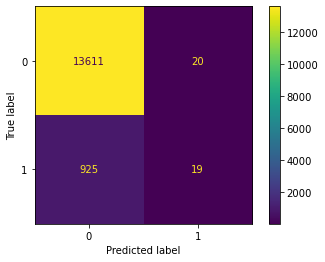

In [35]:
#print better confusion matrix
plt.set_cmap('Pastel1')
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot();

<AxesSubplot:>

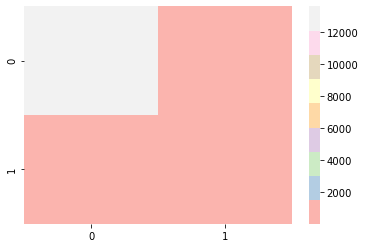

In [36]:
#seaborn confusion matrix
sns.heatmap(cm, cmap="Pastel1")

In [37]:
#feature importance
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

dist_from_prev_ev             0.130081
shot_angle                    0.111764
y_prev                        0.104151
x_prev                        0.101633
Shot_Distance                 0.100979
y                             0.093819
Previous_Ev_Seconds           0.091946
x                             0.088990
Seconds_From_Last_Shot        0.028782
Home                          0.022239
Score_Home Team Winning       0.018950
Score_Tied                    0.018765
Rebound_Seconds               0.015756
Type_WRIST SHOT               0.015016
Type_SNAP SHOT                0.009952
prev_ev_shot                  0.009012
Type_SLAP SHOT                0.007727
Type_TIP-IN                   0.007667
Type_DEFLECTED                0.005286
Shot_Off_Last_Shot            0.004947
Shot_Off_Rebound              0.004230
Dangerous_Shot_Off_Shot       0.004166
Dangerous_Shot_Off_Rebound    0.002305
Type_WRAP-AROUND              0.001838
dtype: float64

Interesting results from the feature importance metric. Basically, the shot distance and angle (location) is the main thing that matters in this model. I think the rebound features are very important, but they occur so infrequently that the model doesn't value them much. The shot types might just be dropped from the model.

In [38]:
#K-folds cross validation
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Note the results will vary each run since we take a different
#   subset of the data each time (since shuffle=True)
kf = KFold(n_splits=5, shuffle=True, random_state=42) #note same step as above)
#rf = RandomForestClassifier(random_state=30)

In [39]:
scores= cross_val_score(model, X, y, cv=kf, scoring='roc_auc')
print('CV AUC {}, \nAverage AUC {}'.format(scores, scores.mean()))

CV AUC [0.74272425 0.75150435 0.7498627  0.7644992  0.75601943], 
Average AUC 0.7529219843369445


# Grid Search

In [40]:
#Import GridSearchCV from sklearn's model selection library
from sklearn.model_selection import GridSearchCV

In [41]:
#print('Processing GridSearch. Please hold for the next available set of outputs.\n')
#parameters = {"max_depth": [5,10,15,20,25,30,35]
#             ,"min_samples_split" :[2,3,4,5,6]
#             ,"n_estimators" : [100,500,1000,2000,3000]
#             ,"min_samples_leaf": [1,2,3,4,5]
#             ,"criterion": ('gini','entropy')}

#rf = RandomForestClassifier(random_state=42)
#gd_model = GridSearchCV(rf, parameters, n_jobs = -1, cv=10)
#gd_model.fit(X,y)

#print(gd_model.best_params_)
#print(gd_model.best_estimator_)
#print(gd_model.best_score_)

# XGBoost

In [58]:
#try the same model above but with XGBoost instead of random forest

# fit model
xgb_model = XGBClassifier(n_estimators = 700,
                         max_depth = 3, 
                         learning_rate = .05)
xgb_model.fit(X_train, y_train)

[08:35:27] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=700, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [59]:
# make predictions for test data
y_pred = xgb_model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [60]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
pred_proba = xgb_model.predict_proba(X_test)[:,1] # returns predicted probabilites
#print("Accuracy: %.2f%%" % (accuracy * 100.0))
print("Accuracy", accuracy_score(y_test, predictions).round(3))
print("AUC", roc_auc_score(y_test, pred_proba).round(3))
print(confusion_matrix(y_test, predictions))

Accuracy 0.936
AUC 0.775
[[13621    10]
 [  926    18]]


In [62]:
#print out accuracy measures
print("The model used is Random Forest classifier")
acc= accuracy_score(y_test,y_pred).round(3)
print("The accuracy is  {}".format(acc))
prec= precision_score(y_test,y_pred).round(3)
print("The precision is {}".format(prec))
rec= recall_score(y_test,y_pred).round(3)
print("The recall is {}".format(rec))
f1= f1_score(y_test,y_pred).round(3)
print("The F1-Score is {}".format(f1))

The model used is Random Forest classifier
The accuracy is  0.936
The precision is 0.643
The recall is 0.019
The F1-Score is 0.037


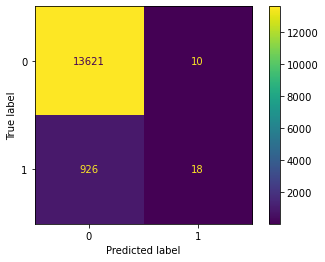

In [61]:
cm2 = confusion_matrix(y_test, predictions)
ConfusionMatrixDisplay(confusion_matrix=cm2).plot();

In [54]:
#Grid search
estimator = XGBClassifier(
    objective= 'binary:logistic',
    nthread=4,
    seed=39
)

In [55]:
parameters = {
    'max_depth': range (2, 10, 1),
    'n_estimators': range(50, 400, 50),
    'learning_rate': [0.1, 0.01, 0.05]
}

In [56]:
grid_search = GridSearchCV(
    estimator=estimator,
    param_grid=parameters,
    scoring = 'roc_auc',
    n_jobs = 10,
    cv = 10,
    verbose=True
)

In [57]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 168 candidates, totalling 1680 fits


[Parallel(n_jobs=10)]: Using backend LokyBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done  30 tasks      | elapsed:   27.9s
[Parallel(n_jobs=10)]: Done 180 tasks      | elapsed:  5.2min
[Parallel(n_jobs=10)]: Done 430 tasks      | elapsed: 21.7min
[Parallel(n_jobs=10)]: Done 780 tasks      | elapsed: 43.4min
[Parallel(n_jobs=10)]: Done 1230 tasks      | elapsed: 77.4min
[Parallel(n_jobs=10)]: Done 1680 out of 1680 | elapsed: 111.5min finished
C:\Users\BRG4142\.conda\envs\virtual_conda\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[17:34:44] WARNING: D:\bld\xgboost-split_1637426510059\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None, nthread=4,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scal

# Prediction Analysis

In [149]:
len(pred_proba)

14575

In [150]:
y_test.shape

(14575,)

In [46]:
test = []
for g in y_test:
    test.append(g)
#test

In [47]:
pred = []
for p in pred_proba:
    pred.append(p)
#pred

In [48]:
print(len(test))
print(len(pred))

14719
14719


In [109]:
data_tuples = list(zip(test,pred))

df3 = pd.DataFrame(data_tuples, columns=['y_test','y_pred_prob'])
df3.sort_values(by='y_pred_prob', ascending=False).head(25)

,y_test,y_pred_prob
1940,0,0.720680
10659,0,0.714226
11979,0,0.681000
4867,0,0.675000
4060,0,0.671797
5596,0,0.665018
12551,0,0.664500
4982,1,0.654000
8451,1,0.648500
3640,1,0.648094


In [50]:
df3['y_pred_prob'].describe()

count    14719.000000
mean         0.066918
std          0.081652
min          0.000000
25%          0.011470
50%          0.037000
75%          0.092281
max          0.720680
Name: y_pred_prob, dtype: float64

In [51]:
df3['y_test'].value_counts()

0    13788
1      931
Name: y_test, dtype: int64

In [52]:
#df4 = df3.loc[df3['y_pred_prob'] > 0.08]
df4 = df3.loc[df3['y_test'] == 1]

In [110]:
df4.sort_values(by='y_pred_prob', ascending=False).head(25)

,y_test,y_pred_prob
4982,1,0.654000
8451,1,0.648500
3640,1,0.648094
6262,1,0.636500
3005,1,0.623709
14394,1,0.607000
9422,1,0.592500
3740,1,0.570500
9126,1,0.552954
14288,1,0.536000


In [56]:
df5 = pd.merge(y_train,df3,how = 'inner',left_index = True, right_index = True)
df5.head

<bound method NDFrame.head of        Goal  y_test  y_pred_prob
10124     0       0     0.001118
1185      0       0     0.045890
14148     0       0     0.125320
2568      0       1     0.004742
3080      0       1     0.156736
...     ...     ...          ...
12373     0       0     0.003107
5244      0       0     0.000525
8671      0       0     0.002543
7395      0       0     0.018086
4750      0       0     0.032947

[10992 rows x 3 columns]>

In [55]:
df5.shape

(44155, 3)

In [57]:
df6 = pd.merge(df,df5,how = 'inner',left_index = True, right_index = True)

In [111]:
df6.to_excel("pred_values_2021.xlsx", sheet_name='data')

In [58]:
df6.head()

,Unnamed: 0,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,...,Shot_Distance,Shot_Off_Rebound,Shot_Off_Last_Shot,Dangerous_Shot_Off_Rebound,Dangerous_Shot_Off_Shot,Goalie_rebound_given,Goalie__dangerous_rebound_given,Goal_y,y_test,y_pred_prob
0,2,20001,2021-01-13,1,SHOT,"PHI ONGOAL - #11 KONECNY, Wrist, Off. Zone, 32...",0:16,16,5x5,Off,...,32,0,0,0,0,0.0,0.0,0,0,0.045079
1,5,20001,2021-01-13,1,SHOT,"PIT ONGOAL - #9 RODRIGUES, Wrist, Off. Zone, 4...",0:34,34,5x5,Off,...,47,0,0,0,0,0.0,0.0,0,0,0.080770
2,8,20001,2021-01-13,1,SHOT,"PHI ONGOAL - #86 FARABEE, Backhand, Off. Zone,...",1:05,65,5x5,Off,...,48,0,0,0,0,0.0,0.0,0,0,0.003589
3,20,20001,2021-01-13,1,SHOT,"PIT ONGOAL - #9 RODRIGUES, Snap, Off. Zone, 60...",2:51,171,5x5,Off,...,60,0,0,0,0,0.0,0.0,0,0,0.197264
4,23,20001,2021-01-13,1,MISS,"PHI #5 MYERS, Slap, Wide of Net, Off. Zone, 54...",3:29,209,5x5,Off,...,54,0,0,0,0,0.0,0.0,0,0,0.005089


In [153]:
df_is = df6[df6['Goalie_shot_on'] == "IGOR SHESTERKIN"]
df_jg = df6[df6['Goalie_shot_on'] == "JOHN GIBSON"]
df_ch = df6[df6['Goalie_shot_on'] == "CONNOR HELLEBUYCK"]
df_cp = df6[df6['Goalie_shot_on'] == "CALVIN PETERSEN"]
df_mm = df6[df6['Goalie_shot_on'] == "MATT MURRAY"]
df_crh = df6[df6['Goalie_shot_on'] == "CARTER HART"]
df_mj = df6[df6['Goalie_shot_on'] == "MARTIN JONES"]
df_js = df6[df6['Goalie_shot_on'] == "JUUSE SAROS"]

In [62]:
df_is.head()

,Unnamed: 0,Game_Id,Date,Period,Event,Description,Time_Elapsed,Seconds_Elapsed,Strength,Ev_Zone,...,Shot_Distance,Shot_Off_Rebound,Shot_Off_Last_Shot,Dangerous_Shot_Off_Rebound,Dangerous_Shot_Off_Shot,Goalie_rebound_given,Goalie__dangerous_rebound_given,Goal_y,y_test,y_pred_prob
440,2006,20008,2021-01-14,1,SHOT,"NYR ONGOAL - #93 ZIBANEJAD, Wrist, Neu. Zone, ...",0:21,21,5x5,Neu,...,96,0,0,0,0,0.0,0.0,0,0,0.137188
443,2025,20008,2021-01-14,1,MISS,"NYI #27 LEE, Tip-In, Wide of Net, Off. Zone, 1...",3:21,201,5x5,Off,...,15,0,0,0,0,0.0,0.0,0,0,0.004625
444,2027,20008,2021-01-14,1,SHOT,"NYI ONGOAL - #27 LEE, Snap, Off. Zone, 10 ft.",3:37,217,5x5,Off,...,10,0,0,0,0,1.0,0.0,0,0,0.019672
445,2028,20008,2021-01-14,1,GOAL,"NYI #27 LEE(1), Snap, Off. Zone, 27 ft.Assist:...",3:52,232,5x5,Off,...,27,1,1,0,0,0.0,0.0,1,0,0.018224
448,2044,20008,2021-01-14,1,SHOT,"NYI ONGOAL - #6 PULOCK, Slap, Off. Zone, 47 ft.",6:31,391,5x5,Off,...,47,0,0,0,0,0.0,0.0,0,0,0.040314


In [97]:
#Igor Shesterkin
print("Igor Shesterkin Shots Against: ", len(df_is[(df_is['Event'] == 'SHOT') | (df_is['Event'] == 'GOAL')]))
print("Igor Shesterkin Goals Allowed: ", len(df_is[df_is['Event'] == 'GOAL']))
print("Igor Shesterkin Save Percentage: ", (len(df_is[df_is['Event'] == 'SHOT'])) / (len(df_is[(df_is['Event'] == 'SHOT') | (df_is['Event'] == 'GOAL')])))
print("Igor Shesterkin Fenwick Save Percentage: ", (len(df_is[(df_is['Event'] == 'SHOT') | (df_is['Event'] == 'MISS')])) / (len(df_is[(df_is['Event'] == 'SHOT') | (df_is['Event'] == 'GOAL') | (df_is['Event'] == 'MISS')])))

print("Igor Shesterkin Expected Goals Against: ", df_is['y_pred_prob'].sum())
print("Igor Shesterkin Goals Against: ", df_is['Goal_y'].sum())
print("Igor Shesterkin Expected Goals Against (whole): ", df_is['y_test'].sum())
print("Igor Shesterkin Freeze Rate: ", (df_is['Freeze'].sum() / len(df_is['Freeze'])))
print("Igor Shesterkin Goals Above Expected: ", (df_is['y_pred_prob'].sum()) - (df_is['Goal_y'].sum()))

Igor Shesterkin Shots Against:  144
Igor Shesterkin Goals Allowed:  12
Igor Shesterkin Save Percentage:  0.9166666666666666
Igor Shesterkin Fenwick Save Percentage:  0.9387755102040817
Igor Shesterkin Expected Goals Against:  11.714105249737283
Igor Shesterkin Goals Against:  12
Igor Shesterkin Expected Goals Against (whole):  11
Igor Shesterkin Freeze Rate:  0.2193877551020408
Igor Shesterkin Goals Above Expected:  -0.2858947502627167


In [98]:
#John Gibson
print("John Gibson Shots Against: ", len(df_jg[(df_jg['Event'] == 'SHOT') | (df_jg['Event'] == 'GOAL')]))
print("John Gibson Goals Allowed: ", len(df_jg[df_jg['Event'] == 'GOAL']))
print("John Gibson Save Percentage: ", (len(df_jg[df_jg['Event'] == 'SHOT'])) / (len(df_jg[(df_jg['Event'] == 'SHOT') | (df_jg['Event'] == 'GOAL')])))
print("John Gibson Fenwick Save Percentage: ", (len(df_jg[(df_jg['Event'] == 'SHOT') | (df_jg['Event'] == 'MISS')])) / (len(df_jg[(df_jg['Event'] == 'SHOT') | (df_jg['Event'] == 'GOAL') | (df_jg['Event'] == 'MISS')])))

print("John Gibson Expected Goals Against: ", df_jg['y_pred_prob'].sum())
print("John Gibson Goals Against: ", df_jg['Goal_y'].sum())
print("John Gibson Expected Goals Against (whole): ", df_jg['y_test'].sum())
print("John Gibson Freeze Rate: ", (df_jg['Freeze'].sum() / len(df_jg['Freeze'])))
print("John Gibson Goals Above Expected: ", (df_jg['y_pred_prob'].sum()) - (df_jg['Goal_y'].sum()))

John Gibson Shots Against:  207
John Gibson Goals Allowed:  17
John Gibson Save Percentage:  0.9178743961352657
John Gibson Fenwick Save Percentage:  0.9451612903225807
John Gibson Expected Goals Against:  18.725901639376776
John Gibson Goals Against:  17
John Gibson Expected Goals Against (whole):  23
John Gibson Freeze Rate:  0.23225806451612904
John Gibson Goals Above Expected:  1.7259016393767759


In [99]:
#Connor Hellebuyck
print("Connor Hellebuyck Shots Against: ", len(df_ch[(df_ch['Event'] == 'SHOT') | (df_ch['Event'] == 'GOAL')]))
print("Connor Hellebuyck Goals Allowed: ", len(df_ch[df_ch['Event'] == 'GOAL']))
print("Connor Hellebuyck Save Percentage: ", (len(df_ch[df_ch['Event'] == 'SHOT'])) / (len(df_ch[(df_ch['Event'] == 'SHOT') | (df_ch['Event'] == 'GOAL')])))
print("Connor Hellebuyck Fenwick Save Percentage: ", (len(df_ch[(df_ch['Event'] == 'SHOT') | (df_ch['Event'] == 'MISS')])) / (len(df_ch[(df_ch['Event'] == 'SHOT') | (df_ch['Event'] == 'GOAL') | (df_ch['Event'] == 'MISS')])))

print("Connor Hellebuyck Expected Goals Against: ", df_ch['y_pred_prob'].sum())
print("Connor Hellebuyck Goals Against: ", df_ch['Goal_y'].sum())
print("Connor Hellebuyck Expected Goals Against (whole): ", df_ch['y_test'].sum())
print("Connor Hellebuyck Freeze Rate: ", (df_ch['Freeze'].sum() / len(df_ch['Freeze'])))
print("Connor Hellebuyck Goals Above Expected: ", (df_ch['y_pred_prob'].sum()) - (df_ch['Goal_y'].sum()))

Connor Hellebuyck Shots Against:  232
Connor Hellebuyck Goals Allowed:  18
Connor Hellebuyck Save Percentage:  0.9224137931034483
Connor Hellebuyck Fenwick Save Percentage:  0.9442724458204335
Connor Hellebuyck Expected Goals Against:  21.457999071259145
Connor Hellebuyck Goals Against:  18
Connor Hellebuyck Expected Goals Against (whole):  20
Connor Hellebuyck Freeze Rate:  0.20123839009287925
Connor Hellebuyck Goals Above Expected:  3.4579990712591453


In [96]:
#Cal Peterson
print("Cal Petersen Shots Against: ", len(df_cp[(df_cp['Event'] == 'SHOT') | (df_cp['Event'] == 'GOAL')]))
print("Cal Petersen Goals Allowed: ", len(df_cp[df_cp['Event'] == 'GOAL']))
print("Cal Petersen Save Percentage: ", (len(df_cp[df_cp['Event'] == 'SHOT'])) / (len(df_cp[(df_cp['Event'] == 'SHOT') | (df_cp['Event'] == 'GOAL')])))
print("Cal Petersen Fenwick Save Percentage: ", (len(df_cp[(df_cp['Event'] == 'SHOT') | (df_cp['Event'] == 'MISS')])) / (len(df_cp[(df_cp['Event'] == 'SHOT') | (df_cp['Event'] == 'GOAL') | (df_cp['Event'] == 'MISS')])))

print("Cal Petersen Expected Goals Against: ", df_cp['y_pred_prob'].sum())
print("Cal Petersen Goals Against: ", df_cp['Goal_y'].sum())
print("Cal Petersen Expected Goals Against (whole): ", df_cp['y_test'].sum())
print("Cal Petersen Freeze Rate: ", (df_cp['Freeze'].sum() / len(df_is['Freeze'])))
print("Cal Petersen Goals Above Expected: ", (df_cp['y_pred_prob'].sum()) - (df_cp['Goal_y'].sum()))

Cal Petersen Shots Against:  170
Cal Petersen Goals Allowed:  10
Cal Petersen Save Percentage:  0.9411764705882353
Cal Petersen Fenwick Save Percentage:  0.9553571428571429
Cal Petersen Expected Goals Against:  16.94046037282008
Cal Petersen Goals Against:  10
Cal Petersen Expected Goals Against (whole):  17
Cal Petersen Freeze Rate:  0.29591836734693877
Cal Petersen Goals Above Expected:  6.94046037282008


In [101]:
#Matt Murray
print("Matt Murray Shots Against: ", len(df_mm[(df_mm['Event'] == 'SHOT') | (df_mm['Event'] == 'GOAL')]))
print("Matt Murray Goals Allowed: ", len(df_mm[df_mm['Event'] == 'GOAL']))
print("Matt Murray Save Percentage: ", (len(df_mm[df_mm['Event'] == 'SHOT'])) / (len(df_mm[(df_mm['Event'] == 'SHOT') | (df_mm['Event'] == 'GOAL')])))
print("Matt Murray Fenwick Save Percentage: ", (len(df_mm[(df_mm['Event'] == 'SHOT') | (df_mm['Event'] == 'MISS')])) / (len(df_mm[(df_mm['Event'] == 'SHOT') | (df_mm['Event'] == 'GOAL') | (df_mm['Event'] == 'MISS')])))

print("Matt Murray Expected Goals Against: ", df_mm['y_pred_prob'].sum())
print("Matt Murray Goals Against: ", df_mm['Goal_y'].sum())
print("Matt Murray Expected Goals Against (whole): ", df_mm['y_test'].sum())
print("Matt Murray Freeze Rate: ", (df_mm['Freeze'].sum() / len(df_mm['Freeze'])))
print("Matt Murray Goals Above Expected: ", (df_mm['y_pred_prob'].sum()) - (df_mm['Goal_y'].sum()))

Matt Murray Shots Against:  177
Matt Murray Goals Allowed:  18
Matt Murray Save Percentage:  0.8983050847457628
Matt Murray Fenwick Save Percentage:  0.926530612244898
Matt Murray Expected Goals Against:  19.847331684410317
Matt Murray Goals Against:  18
Matt Murray Expected Goals Against (whole):  15
Matt Murray Freeze Rate:  0.19591836734693877
Matt Murray Goals Above Expected:  1.8473316844103174


In [103]:
#Carter Hart
print("Carter Hart Shots Against: ", len(df_crh[(df_crh['Event'] == 'SHOT') | (df_crh['Event'] == 'GOAL')]))
print("Carter Hart Goals Allowed: ", len(df_crh[df_crh['Event'] == 'GOAL']))
print("Carter Hart Save Percentage: ", (len(df_crh[df_crh['Event'] == 'SHOT'])) / (len(df_crh[(df_crh['Event'] == 'SHOT') | (df_crh['Event'] == 'GOAL')])))
print("Carter Hart Fenwick Save Percentage: ", (len(df_crh[(df_crh['Event'] == 'SHOT') | (df_crh['Event'] == 'MISS')])) / (len(df_crh[(df_crh['Event'] == 'SHOT') | (df_crh['Event'] == 'GOAL') | (df_crh['Event'] == 'MISS')])))

print("Carter Hart Expected Goals Against: ", df_crh['y_pred_prob'].sum())
print("Carter Hart Goals Against: ", df_crh['Goal_y'].sum())
print("Carter Hart Expected Goals Against (whole): ", df_crh['y_test'].sum())
print("Carter Hart Freeze Rate: ", (df_crh['Freeze'].sum() / len(df_crh['Freeze'])))
print("Carter Hart Goals Above Expected: ", (df_crh['y_pred_prob'].sum()) - (df_crh['Goal_y'].sum()))

Carter Hart Shots Against:  182
Carter Hart Goals Allowed:  15
Carter Hart Save Percentage:  0.9175824175824175
Carter Hart Fenwick Save Percentage:  0.9402390438247012
Carter Hart Expected Goals Against:  16.84963807406005
Carter Hart Goals Against:  15
Carter Hart Expected Goals Against (whole):  14
Carter Hart Freeze Rate:  0.24302788844621515
Carter Hart Goals Above Expected:  1.8496380740600493


In [105]:
#Martin Jones
print("Martin Jones Shots Against: ", len(df_mj[(df_mj['Event'] == 'SHOT') | (df_mj['Event'] == 'GOAL')]))
print("Martin Jones Goals Allowed: ", len(df_mj[df_mj['Event'] == 'GOAL']))
print("Martin Jones Save Percentage: ", (len(df_mj[df_mj['Event'] == 'SHOT'])) / (len(df_mj[(df_mj['Event'] == 'SHOT') | (df_mj['Event'] == 'GOAL')])))
print("Martin Jones Fenwick Save Percentage: ", (len(df_mj[(df_mj['Event'] == 'SHOT') | (df_mj['Event'] == 'MISS')])) / (len(df_mj[(df_mj['Event'] == 'SHOT') | (df_mj['Event'] == 'GOAL') | (df_mj['Event'] == 'MISS')])))

print("Martin Jones Expected Goals Against: ", df_mj['y_pred_prob'].sum())
print("Martin Jones Goals Against: ", df_mj['Goal_y'].sum())
print("Martin Jones Expected Goals Against (whole): ", df_mj['y_test'].sum())
print("Martin Jones Freeze Rate: ", (df_mj['Freeze'].sum() / len(df_mj['Freeze'])))
print("Martin Jones Goals Above Expected: ", (df_mj['y_pred_prob'].sum()) - (df_mj['Goal_y'].sum()))

Martin Jones Shots Against:  154
Martin Jones Goals Allowed:  17
Martin Jones Save Percentage:  0.8896103896103896
Martin Jones Fenwick Save Percentage:  0.9251101321585903
Martin Jones Expected Goals Against:  17.114801378238802
Martin Jones Goals Against:  17
Martin Jones Expected Goals Against (whole):  13
Martin Jones Freeze Rate:  0.22466960352422907
Martin Jones Goals Above Expected:  0.11480137823880199


In [154]:
#Juuse Saros
print("Juuse Saros Shots Against: ", len(df_js[(df_js['Event'] == 'SHOT') | (df_js['Event'] == 'GOAL')]))
print("Juuse Saros Goals Allowed: ", len(df_js[df_js['Event'] == 'GOAL']))
print("Juuse Saros Save Percentage: ", (len(df_js[df_js['Event'] == 'SHOT'])) / (len(df_js[(df_js['Event'] == 'SHOT') | (df_js['Event'] == 'GOAL')])))
print("Juuse Saros Fenwick Save Percentage: ", (len(df_js[(df_js['Event'] == 'SHOT') | (df_js['Event'] == 'MISS')])) / (len(df_js[(df_js['Event'] == 'SHOT') | (df_js['Event'] == 'GOAL') | (df_js['Event'] == 'MISS')])))

print("Juuse Saros Expected Goals Against: ", df_js['y_pred_prob'].sum())
print("Juuse Saros Goals Against: ", df_js['Goal_y'].sum())
print("Juuse Saros Expected Goals Against (whole): ", df_js['y_test'].sum())
print("Juuse Saros Freeze Rate: ", (df_js['Freeze'].sum() / len(df_js['Freeze'])))
print("Juuse Saros Goals Above Expected: ", (df_js['y_pred_prob'].sum()) - (df_js['Goal_y'].sum()))

Juuse Saros Shots Against:  137
Juuse Saros Goals Allowed:  9
Juuse Saros Save Percentage:  0.9343065693430657
Juuse Saros Fenwick Save Percentage:  0.9540816326530612
Juuse Saros Expected Goals Against:  11.591164521071022
Juuse Saros Goals Against:  9
Juuse Saros Expected Goals Against (whole):  11
Juuse Saros Freeze Rate:  0.25510204081632654
Juuse Saros Goals Above Expected:  2.591164521071022


In [95]:
df_cp[['Goal_y','y_test','y_pred_prob']].head(50).sort_values(by='y_pred_prob', ascending=False)

,Goal_y,y_test,y_pred_prob
3102,0,1,0.356998
4612,0,1,0.303044
4581,0,0,0.202560
3101,1,0,0.167330
5999,0,0,0.143600
4615,0,0,0.126569
3132,0,0,0.124000
4590,0,0,0.111541
3148,0,0,0.089310
3139,0,0,0.085521
